<a href="https://colab.research.google.com/github/novoa123/MachineLearningS10/blob/main/Laboratorio_Red_Neuronal_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [ ]:

from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


In [ ]:

# COMPLETA AQUÍ: Visualización de imágenes con sus etiquetas


In [ ]:
import matplotlib.pyplot as plt

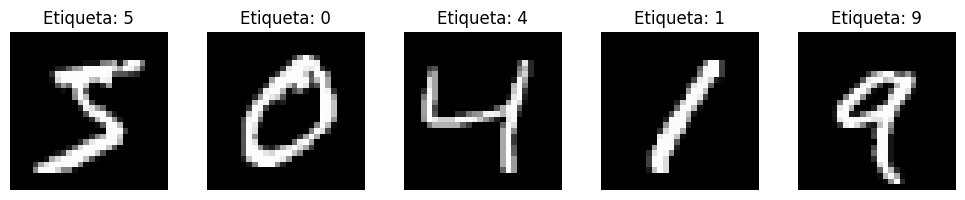

In [ ]:
plt.figure(figsize=(10, 2))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:**
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [ ]:

# COMPLETA AQUÍ: Normalización, flattening y codificación one-hot


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
#Normalizar

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
#Aplanar

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
#Codificacion

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)

print("Tamaño del set de entrenamiento:", y_train.shape)
print("Tamaño del set de test:", y_test.shape)

Tamaño del set de entrenamiento: (60000, 784)
Tamaño del set de test: (10000, 784)
Tamaño del set de entrenamiento: (60000, 10)
Tamaño del set de test: (10000, 10)



## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:**
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [ ]:

# COMPLETA AQUÍ: Definición y compilación del modelo


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [ ]:

# COMPLETA AQUÍ: Entrenamiento del modelo


In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/5
1500/1500 - 7s - 5ms/step - accuracy: 0.1135 - loss: 2.3013 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 2/5
1500/1500 - 9s - 6ms/step - accuracy: 0.1140 - loss: 2.3009 - val_accuracy: 0.1060 - val_loss: 2.3015
Epoch 3/5
1500/1500 - 7s - 5ms/step - accuracy: 0.1140 - loss: 2.3004 - val_accuracy: 0.1060 - val_loss: 2.3006
Epoch 4/5
1500/1500 - 10s - 6ms/step - accuracy: 0.1140 - loss: 2.2992 - val_accuracy: 0.1060 - val_loss: 2.2992
Epoch 5/5
1500/1500 - 9s - 6ms/step - accuracy: 0.1140 - loss: 2.2964 - val_accuracy: 0.1060 - val_loss: 2.2952



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


In [ ]:

# COMPLETA AQUÍ: Evaluación del modelo


In [ ]:

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)


print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 2.2937
Test Accuracy: 0.1135


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

In [ ]:
# Tu respuesta aquí

# La codificacion one-hot permite que la red aprenda cada clase como una categoria independiente
# Es esencial para funciones de perdida, como puede ser 'categorical_crossentropy'


### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

In [ ]:
# Tu respuesta aquí

# Aumentar la cantidad de neuronas puede mejorar el aprendizaje, pero tambien aumentan el riesgo
# de sobreajuste
# Menos neuronas pueden hacer que el modelo no aprenda lo suficiente

### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

In [ ]:
# Tu respuesta aquí

# Una alternativa puede ser 'sgd'
# Es mas simple que 'adam' y mas util para entender el proceso de entrenamiento, aunque puede resultar
# mas lento

### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

In [ ]:
# Tu respuesta aquí

# Puede mejorar la precision, pero si se entrena demasiado, el modelo puede sufrir un sobreajuste

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

In [ ]:
# Tu respuesta aquí

# Es importante para verificar que el modelo no solo memoriza los datos de entrenamiento
# El conjunto de prueba evalua el rendimiento en datos nuevos